## 보스턴 집값데이터 예측

* sklearn 패키지에 포함된 데이터 셋
* 1978 보스턴 주택가격 데이터셋으로 단위 1,000달러)
* 범죄율, 비소매상업지역 면적비율, 일산화질소 농도, 주택당 방수, 인구 중 하위계층 비율, 인구 중 흑인 비율, 학생/교사 비율, 25000 평방피트를 초과 거주지역 비율, 찰스강의 경계에 위치 유무 (경계:1 / 경계아니면 0), 1940년 이전에 건축된 주택의 비율, 방사형 고속도로까지의 거리, 직업센터와 거리, 재산세율
* 참고싸이트: 
1. https://datascienceschool.net/03%20machine%20learning/04.01%20%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D%20%EC%98%88%EC%A0%9C.html

2. https://morningcoding.tistory.com/m/entry/Python-72ScikitLearn%EC%9D%84-%EC%9D%B4%EC%9A%A9%ED%95%9C-Boston-House-Data-%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D1?category=737106


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

## 데이터 로드 및 살펴보기

In [ ]:
boston_dataset = load_boston()
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
boston_dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [ ]:
boston_dataset .feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [ ]:
boston_dataset.data.shape 

(506, 13)

In [ ]:
boston_dataset.target.shape

(506,)

In [ ]:
x = pd.DataFrame(boston_dataset.data, columns=boston_dataset .feature_names)
x.head()

CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0  0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1  0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2  0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3  0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4  0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33

[5 rows x 13 columns]

In [ ]:
x.iloc[:,0]

0      0.00632
1      0.02731
2      0.02729
3      0.03237
4      0.06905
        ...   
501    0.06263
502    0.04527
503    0.06076
504    0.10959
505    0.04741
Name: CRIM, Length: 506, dtype: float64

In [ ]:
y = pd.DataFrame(boston_dataset.target, columns=['MEDV'])
y.head()

MEDV
0  24.0
1  21.6
2  34.7
3  33.4
4  36.2

In [ ]:
print('len(x):', len(x))
print('len(y):', len(y))

len(x): 506
len(y): 506


In [ ]:
df = pd.concat([x, y], axis=1)
df.tail()

CRIM   ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  MEDV
501  0.06263  0.0  11.93   0.0  0.573  ...  273.0     21.0  391.99   9.67  22.4
502  0.04527  0.0  11.93   0.0  0.573  ...  273.0     21.0  396.90   9.08  20.6
503  0.06076  0.0  11.93   0.0  0.573  ...  273.0     21.0  396.90   5.64  23.9
504  0.10959  0.0  11.93   0.0  0.573  ...  273.0     21.0  393.45   6.48  22.0
505  0.04741  0.0  11.93   0.0  0.573  ...  273.0     21.0  396.90   7.88  11.9

[5 rows x 14 columns]

## 독립변수와 종속변수의 관계를 스캐터플롯(scatter plot)으로 살펴보자

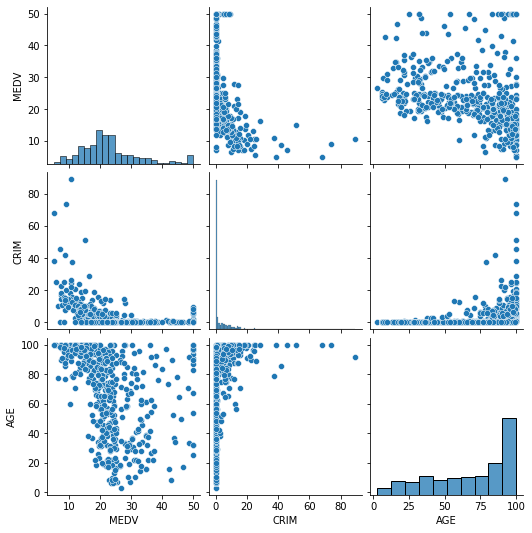

In [ ]:
#각 column별 데이터에 대한 상관관계나 분류적 특성을 바로 명령 한 줄로 확인 할 수 있는 pairplot
#참고싸이트: https://pinkwink.kr/986
sns.pairplot(df[["MEDV","CRIM", "AGE"]])#[["MEDV", "RM","CRIM", "AGE", "CHAS"]]
plt.show()

이 플롯의 첫 행을 보면 종속변수인 집값(MEDV)과 방 개수(RM), 노후화 정도(AGE)와 어떤 관계를 가지는지 알 수 있다.

방 개수가 증가할 수록 집값은 증가하는 경향이 뚜렷하다.

노후화 정도와 집값은 관계가 없어 보인다.

또한 스케터플롯의 모양으로부터 찰스강 유역 여부(CHAS)는 범주값이며 값이 1이면 0일 때 보다 집값의 평균이 더 높아지는 것도 볼 수 있다.

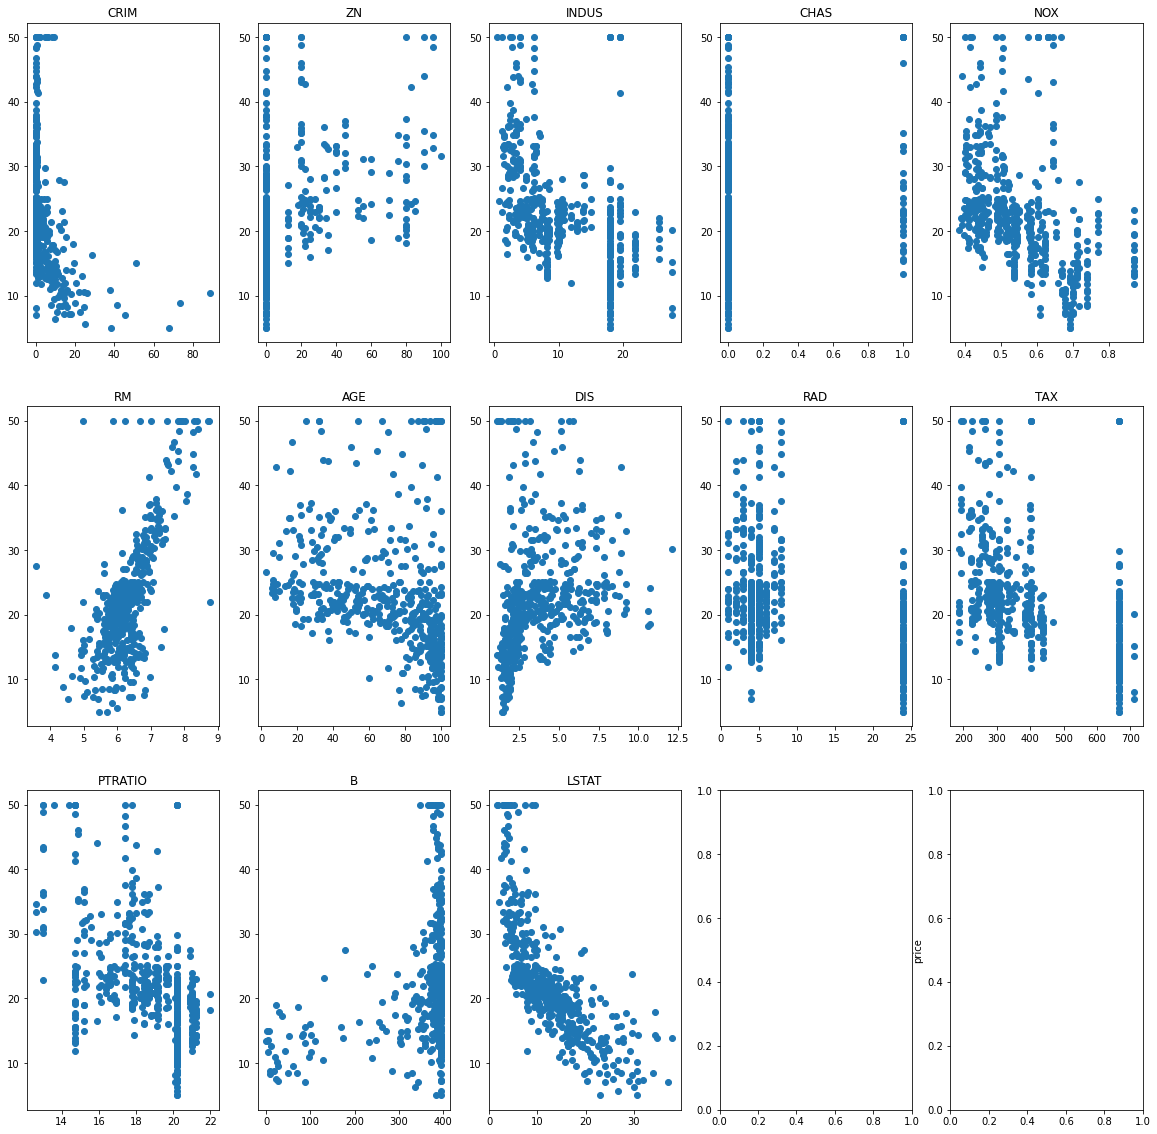

In [ ]:
# 컬럼별 산점도 그리는 두번쨰 방법
features = boston_dataset.feature_names
fig, ax = plt.subplots(3, 5, figsize=(20,20))

ax_flat = ax.flatten()
for i in range(len(features)):
    subplot = ax_flat[i]
    subplot.scatter(x.iloc[:, i], y)
    subplot.set_title(features[i])
plt.ylabel('price')
plt.show()

## 데이터 분리 (학습데이터/테스트데이터)

In [ ]:
# model = LinearRegression(fit_intercept=True)
# model.fit(X, y) #행렬 형태의 입력 데이터와 1차원 벡터 형태의 정답(라벨)을 각각 넣어 줍니다.

fit 메서드를 호출하면 모형 객체는 다음과 같은 속성을 가지게 된다. 또한 fit 메서드는 객체 자신을 반환한다.

* coef_ : 추정된 가중치 벡터
* intercept_ : 추정된 상수항

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(x, y, random_state = 5, test_size=0.2)
#train_input, test_input,train_target,test_target

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404, 1)
(102, 1)


In [ ]:
print(f'X_train len: {len(X_train)}, X_test len:{len(X_test)}, y_train len:{len(y_train)}, y_test len:{len(y_test)}')

X_train len: 404, X_test len:102, y_train len:404, y_test len:102


## 범죄률에 따른 집값예측

In [ ]:
X_train_crim = np.array(X_train.iloc[:, 0]).reshape(-1, 1)
X_test_crim = np.array(X_test.iloc[:, 0]).reshape(-1, 1)# 행렬로 만들어줌
print(f'X_train_crim: {X_train_crim.shape}, X_test_crim: {X_test_crim.shape} ')

X_train_crim: (404, 1), X_test_crim: (102, 1) 


In [ ]:
model = LinearRegression()
result = model.fit(X_train_crim, y_train) #행렬 형태의 입력 데이터와 1차원 벡터 형태의 정답(라벨)을 각각 넣어 줍니다.
print(model.intercept_, model.coef_)

[24.12202188] [[-0.41546547]]


In [ ]:
y_pred_crim = model.predict(X_test_crim)

In [ ]:
from sklearn.metrics import mean_squared_error
mse =mean_squared_error(y_test, y_pred_crim)
print(mse)

66.92380714139914


In [ ]:
rmse = np.sqrt(mse)
print(rmse)

8.180697228317348


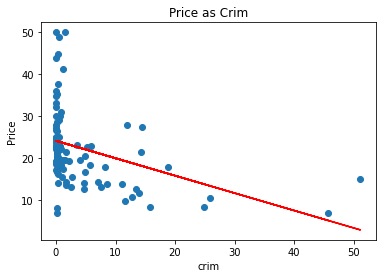

In [ ]:
# 실제값(scatter), 예측값(plot) 그래프
plt.scatter(X_test_crim, y_test) # 실제값 y_test
plt.plot(X_test_crim, y_pred_crim, 'r-' )
plt.title('Price as Crim')
plt.xlabel('crim')
plt.ylabel('Price')
plt.show()

## Age에 따른 집값예측

In [ ]:
X_train_age = np.array(X_train.iloc[:, 6]).reshape(-1, 1)
X_test_age = np.array(X_test.iloc[:, 6]).reshape(-1, 1)# 행렬로 만들어줌
print(f'X_train_age: {X_train_age.shape}, X_test_age: {X_test_age.shape} ')

X_train_age: (404, 1), X_test_age: (102, 1) 


In [ ]:
model2 = LinearRegression()
result2 = model2.fit(X_train_age, y_train) #행렬 형태의 입력 데이터와 1차원 벡터 형태의 정답(라벨)을 각각 넣어 줍니다.
print(model.intercept_, model.coef_)

[24.12202188] [[-0.41546547]]


In [ ]:
y_pred_age = model2.predict(X_test_age)

In [ ]:
mse_age =mean_squared_error(y_test, y_pred_age)
print(mse_age)

67.8462187008521


In [ ]:
rmse_age = np.sqrt(mse)
print(rmse_age)

8.180697228317348


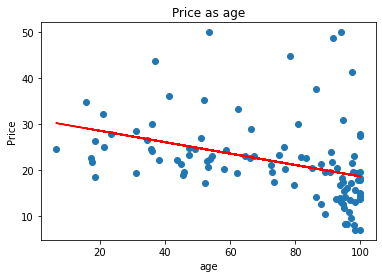

In [ ]:
# 실제값(scatter), 예측값(plot) 그래프
plt.scatter(X_test_age, y_test) # 실제값 y_test
plt.plot(X_test_age, y_pred_age, 'r-' )
plt.title('Price as age')
plt.xlabel('age')
plt.ylabel('Price')
plt.show()